# Teen Market Segmentation Using K-means Clustering

## Dataset Information

The dataset represents a random sample of 30,000 U.S. high school students who had profiles on a well-known SNS in 2006. To protect the users’ anonymity, the SNS will remain unnamed. The data was sampled evenly across four high school graduation years (2006 through 2009) representing the senior, junior, sophomore, and freshman classes at the time of data collection
The dataset contatins 40 variables like: gender, age, friends, basketball, football, soccer, softball, volleyball,swimming, cute, sexy, kissed, sports, rock, god, church, bible, hair, mall, clothes, hollister, drugs etc whcih shows their interests. The final dataset indicates, for each person, how many times each word appeared in the person’s SNS profile

## Load Libraries

In [1]:
import os as os

In [3]:
os.chdir("C:\\Users\\Ankita\\OneDrive\\Desktop\\Training 1\\Unsupervised Learning with K-Means Project")

In [4]:
#set the seed
import random

random.seed(1)

In [5]:
# Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load Data

In [6]:
#pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
data = pd.read_csv("snsdata.csv")
data.head()


,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [7]:
#Dimension of the dataset
data.shape

(30000, 40)

## Summary Statistics

### Summary Statistics of Numerical Variables

In [8]:
data.describe(include="all")

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,27276,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,...,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,22054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2007.500000,NaN,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,...,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,NaN,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,...,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,NaN,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,NaN,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,NaN,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,NaN,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Summary Statistics of Categorical Variables

In [9]:
data.describe(include='object')

,gender
count,27276
unique,2
top,F
freq,22054


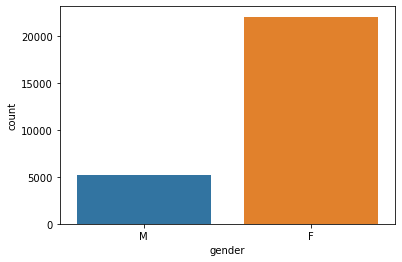

In [10]:
sns.countplot(x="gender",data=data);plt.show()

# Segregating all the numeric features in the dataset

In [11]:
data_numeric_features = data.select_dtypes(include=np.number)

data_numeric_features.head()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,18.982,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,18.801,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,18.335,69,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,18.875,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,18.995,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


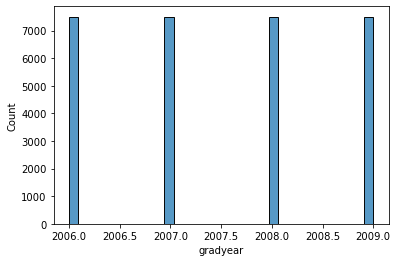

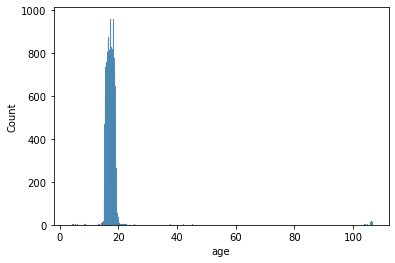

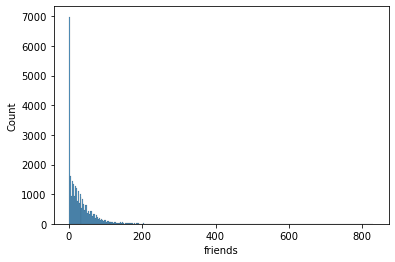

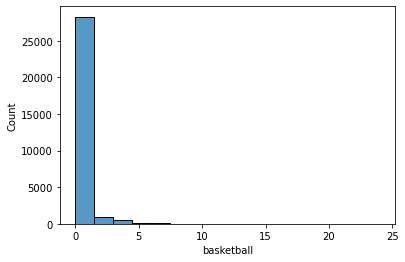

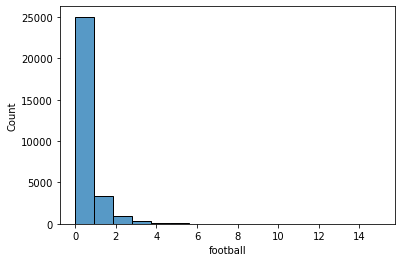

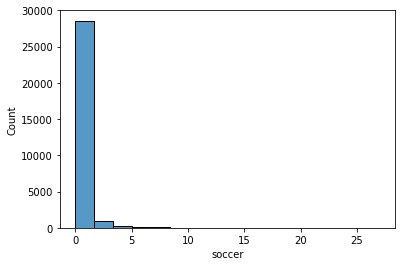

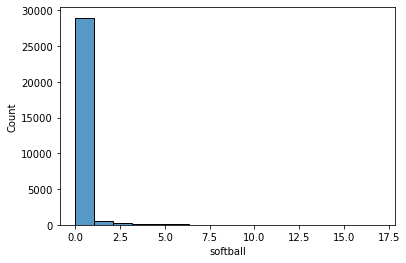

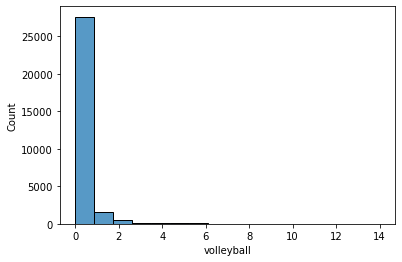

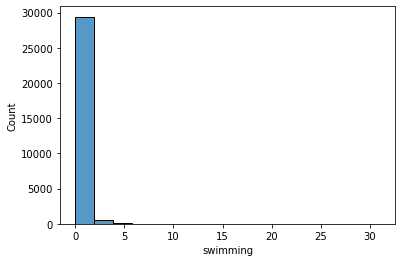

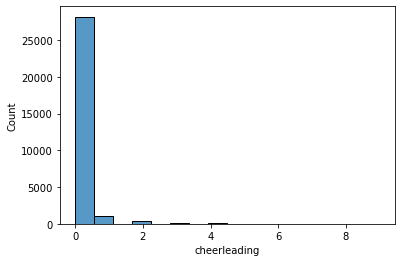

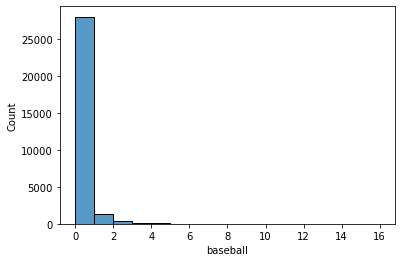

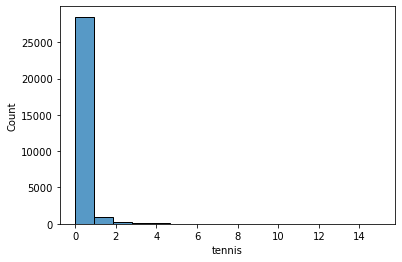

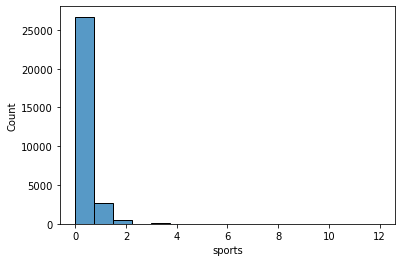

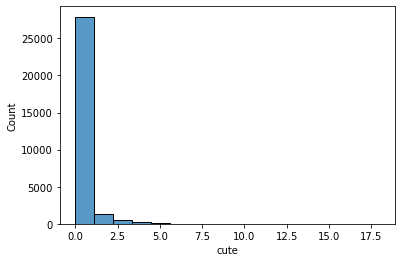

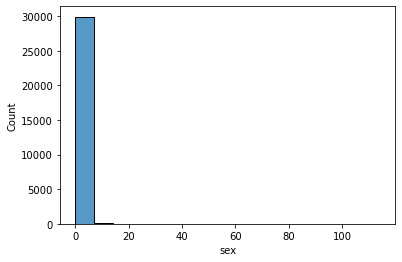

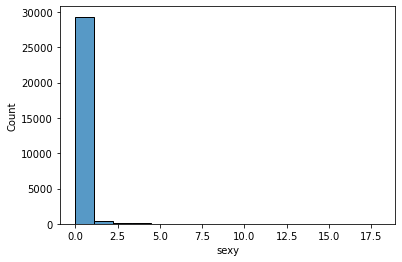

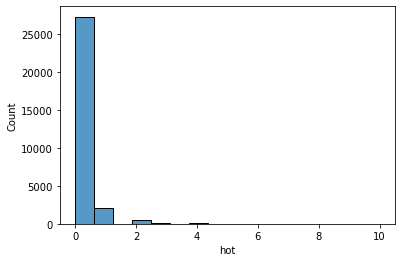

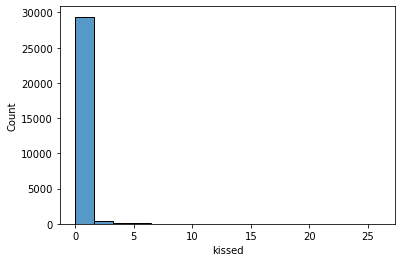

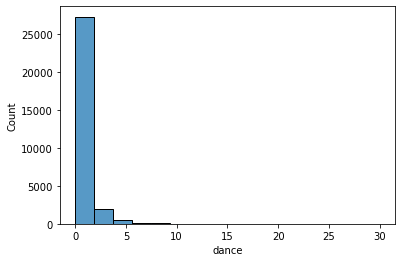

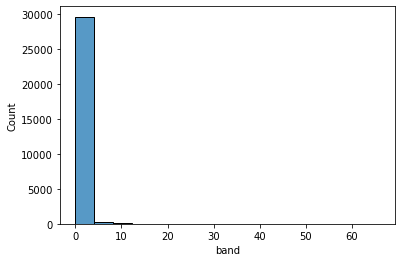

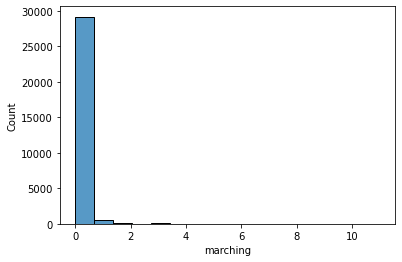

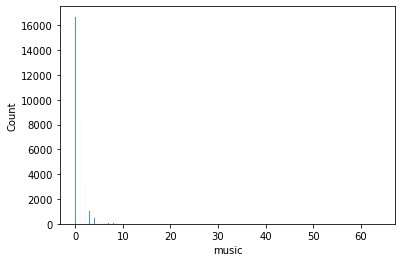

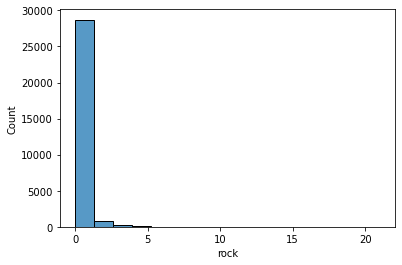

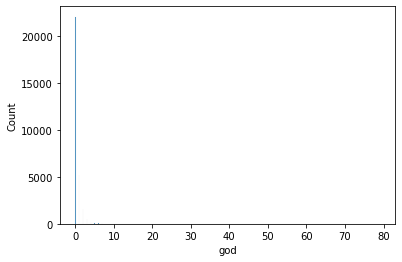

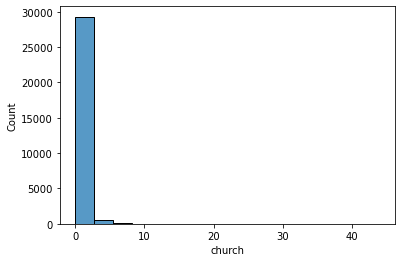

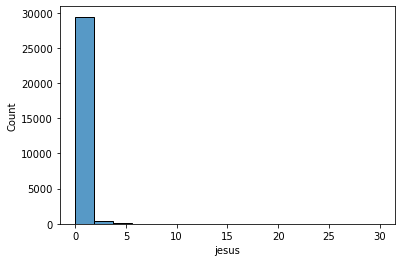

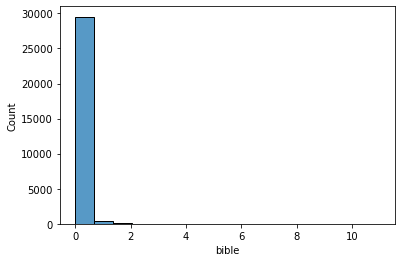

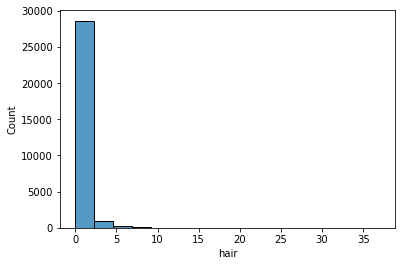

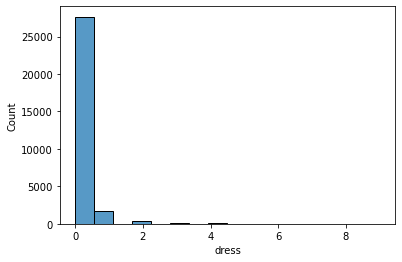

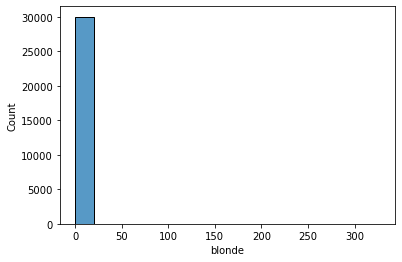

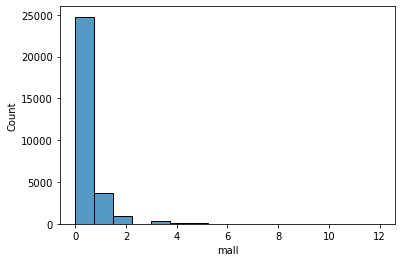

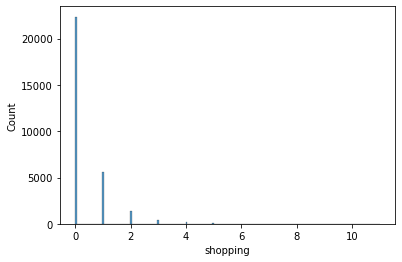

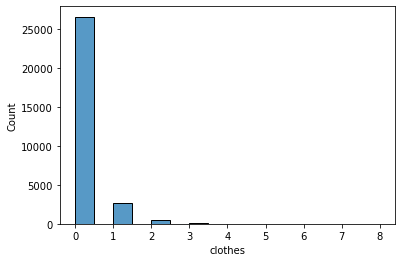

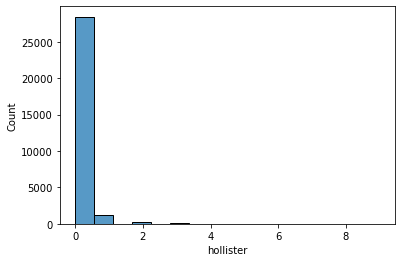

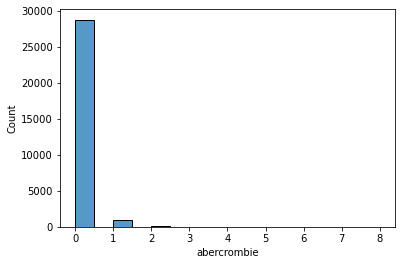

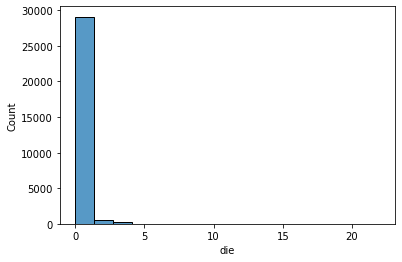

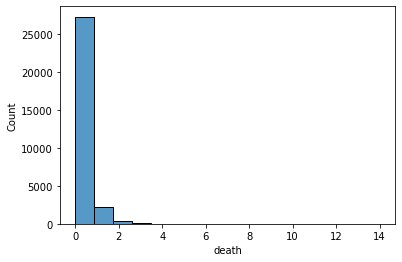

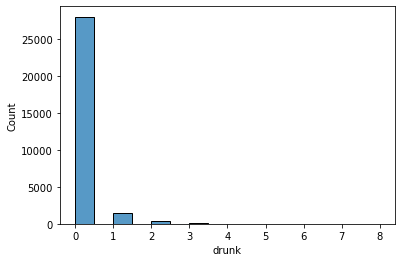

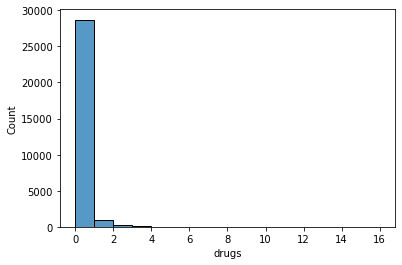

In [12]:
from matplotlib.pyplot import figure
for i in data_numeric_features.columns:
    figure()
    sns.histplot(data_numeric_features[i])

## Treating Missing Values

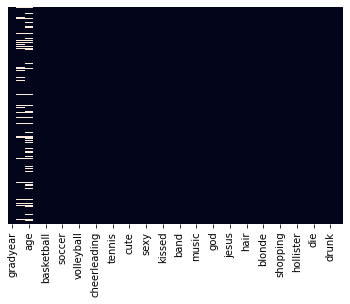

In [13]:
#using heatmap to figure out missing data if any
sns.heatmap(data.isnull(), yticklabels=False,cbar=False)

plt.show()

In [14]:
data.isnull().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

A total of 5,086 records have missing ages. Also concerning is the fact that the minimum and maximum values seem to be unreasonable; it is unlikely that a 3 year old or a 106 year old is attending high school.

Let's have a look at the number of male and female candidates in our dataset

 Let's have a look at the number of male, female and missing values 

In [15]:
data['gender'].value_counts(dropna = False)

F      22054
M       5222
NaN     2724
Name: gender, dtype: int64

There are 22054 female, 5222 male teen students and 2724 missing values

Now we are going to fill all the null values in gender column with “No Gender”

In [16]:
data['gender'].fillna('not disclosed', inplace = True)

In [17]:
data['gender'].isnull().sum()

0

Also, the age cloumn has 5086 missing values. One way to deal with these missing values would be to fill the missing values with the average age of each graduation year

From the above summary we can observe that the mean age differs by roughly one year per change in graduation year. This is not at all surprising, but a helpful finding for confirming our data is reasonable

We now fill the missing values for each graduation year with the mean that we got as above

In [18]:
data["age"] = data.groupby('gradyear')['age'].transform(lambda x : x.fillna(x.mean()))

In [19]:
data.groupby('gradyear')['age'].mean()

gradyear
2006    19.137241
2007    18.391459
2008    17.523867
2009    16.876025
Name: age, dtype: float64

In [20]:
data['age'].isnull().sum()

0

We don't have any missing values in the 'age' column

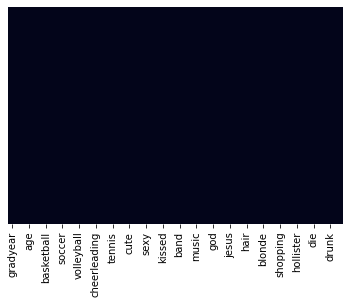

In [21]:
#using heatmap to figure out missing data if any
sns.heatmap(data.isnull(), yticklabels=False,cbar=False)

plt.show()

In [22]:
data.isnull().sum()

gradyear        0
gender          0
age             0
friends         0
basketball      0
football        0
soccer          0
softball        0
volleyball      0
swimming        0
cheerleading    0
baseball        0
tennis          0
sports          0
cute            0
sex             0
sexy            0
hot             0
kissed          0
dance           0
band            0
marching        0
music           0
rock            0
god             0
church          0
jesus           0
bible           0
hair            0
dress           0
blonde          0
mall            0
shopping        0
clothes         0
hollister       0
abercrombie     0
die             0
death           0
drunk           0
drugs           0
dtype: int64

From the above summary we can see that there are no missing values in the dataset

## Treating Outliers

The original age range contains value from 3 - 106, which is unrealistic because student at age of 3 or 106 would not attend high school. A reasonable age range for people attending high school will be the age range between 13 to 21. The rest should be treated as outliers keeping the age of student going to high school in mind. Let's detect the outliers using a box plot below

<AxesSubplot:xlabel='age'>

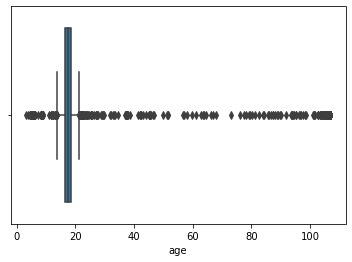

In [23]:
sns.boxplot(data['age'])

In [24]:
q1 = data['age'].quantile(0.25)
q3 = data['age'].quantile(0.75)
iqr = q3-q1

In [25]:
print(iqr)

1.887459224069687


In [26]:
#only including those observations which are falling within the two whisker lines

df = data[(data['age'] > (q1 - 1.5*iqr)) & (data['age'] < (q3 + 1.5*iqr))]

In [27]:
df['age'].describe()

count    29633.000000
mean        17.377469
std          1.147764
min         13.719000
25%         16.501000
50%         17.426000
75%         18.387000
max         21.158000
Name: age, dtype: float64

From the above summary we can observe that after treating the outliers the mininmum age is 13.719000 and the maximum age is 21.158000

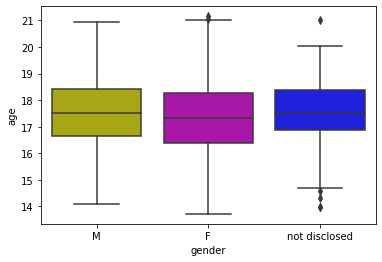

In [28]:
#Distribution of age across gender

sns.boxplot(y="age",x='gender',data=df,palette=["y", "m","b"])
plt.show()

<AxesSubplot:xlabel='gender', ylabel='age'>

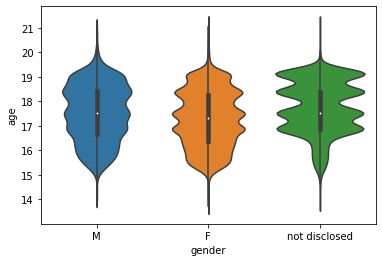

In [29]:
sns.violinplot(x="gender", y="age", data=df)

From the above boxplot we observe that there are no outliers in the age column

## Data Preprocessing

A common practice employed prior to any analysis using distance calculations is to normalize or z-score standardize the features so that each utilizes the same range. By doing so, you can avoid a problem in which some features come to dominate solely because they have a larger range of values than the others.
<br>The process of z-score standardization rescales features so that they have a mean of zero and a standard deviation of one. This transformation changes the interpretation of the data in a way that may be useful here. Specifically, if someone mentions Swimming three times on their profile, without additional information, we have no idea whether this implies they like Swimming more or less than their peers. On the other hand, if the z-score is three, we know that that they mentioned Swimming many more times than the average teenager.

In [30]:
names = df.columns[4:40]
scaled_feature = df.copy()
names

Index(['basketball', 'football', 'soccer', 'softball', 'volleyball',
       'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute',
       'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music',
       'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde',
       'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die',
       'death', 'drunk', 'drugs'],
      dtype='object')

In [31]:
features = scaled_feature[names];features

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



# Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(features.values)

In [33]:
?scaler

In [34]:
features = scaler.transform(features.values)

In [35]:
scaled_feature[names] = features
scaled_feature.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,-0.332682,-0.358976,-0.242549,-0.218636,-0.223895,-0.26001,...,-0.050749,-0.370420,-0.488475,-0.314753,-0.201558,-0.183345,-0.294188,-0.261723,-0.220556,-0.177494
1,2006,F,18.801,0,-0.332682,1.055779,-0.242549,-0.218636,-0.223895,-0.26001,...,-0.050749,1.063874,-0.488475,-0.314753,-0.201558,-0.183345,-0.294188,-0.261723,-0.220556,-0.177494
2,2006,M,18.335,69,-0.332682,1.055779,-0.242549,-0.218636,-0.223895,-0.26001,...,-0.050749,-0.370420,-0.488475,-0.314753,-0.201558,-0.183345,-0.294188,2.020691,-0.220556,-0.177494
3,2006,F,18.875,0,-0.332682,-0.358976,-0.242549,-0.218636,-0.223895,-0.26001,...,-0.050749,-0.370420,-0.488475,-0.314753,-0.201558,-0.183345,-0.294188,-0.261723,-0.220556,-0.177494
4,2006,not disclosed,18.995,10,-0.332682,-0.358976,-0.242549,-0.218636,-0.223895,-0.26001,...,-0.050749,-0.370420,2.264470,-0.314753,-0.201558,-0.183345,-0.294188,-0.261723,2.280682,2.782377


In [36]:
scaled_feature.describe()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,29633.000000,29633.000000,29633.000000,2.963300e+04,2.963300e+04,2.963300e+04,2.963300e+04,2.963300e+04,2.963300e+04,2.963300e+04,...,2.963300e+04,2.963300e+04,2.963300e+04,2.963300e+04,2.963300e+04,2.963300e+04,2.963300e+04,2.963300e+04,2.963300e+04,2.963300e+04
mean,2007.498498,17.377469,30.239227,-2.741445e-16,-6.329242e-15,-1.676456e-14,2.178747e-15,1.222767e-14,-7.454908e-15,-8.127134e-15,...,3.510819e-15,-8.964939e-15,5.452265e-15,1.116571e-14,2.302592e-14,1.792352e-14,-3.693132e-15,9.311591e-16,-2.640508e-15,-1.139343e-15
std,1.117976,1.147764,36.586961,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,...,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,2006.000000,13.719000,0.000000,-3.326823e-01,-3.589764e-01,-2.425488e-01,-2.186365e-01,-2.238954e-01,-2.600100e-01,-2.080558e-01,...,-5.074945e-02,-3.704198e-01,-4.884751e-01,-3.147527e-01,-2.015579e-01,-1.833446e-01,-2.941882e-01,-2.617232e-01,-2.205559e-01,-1.774944e-01
25%,2006.000000,16.501000,3.000000,-3.326823e-01,-3.589764e-01,-2.425488e-01,-2.186365e-01,-2.238954e-01,-2.600100e-01,-2.080558e-01,...,-5.074945e-02,-3.704198e-01,-4.884751e-01,-3.147527e-01,-2.015579e-01,-1.833446e-01,-2.941882e-01,-2.617232e-01,-2.205559e-01,-1.774944e-01
50%,2007.000000,17.426000,20.000000,-3.326823e-01,-3.589764e-01,-2.425488e-01,-2.186365e-01,-2.238954e-01,-2.600100e-01,-2.080558e-01,...,-5.074945e-02,-3.704198e-01,-4.884751e-01,-3.147527e-01,-2.015579e-01,-1.833446e-01,-2.941882e-01,-2.617232e-01,-2.205559e-01,-1.774944e-01
75%,2008.000000,18.387000,44.000000,-3.326823e-01,-3.589764e-01,-2.425488e-01,-2.186365e-01,-2.238954e-01,-2.600100e-01,-2.080558e-01,...,-5.074945e-02,-3.704198e-01,8.879973e-01,-3.147527e-01,-2.015579e-01,-1.833446e-01,-2.941882e-01,-2.617232e-01,-2.205559e-01,-1.774944e-01
max,2009.000000,21.158000,830.000000,2.942471e+01,2.086236e+01,2.915619e+01,2.267484e+01,2.160588e+01,5.960244e+01,1.720263e+01,...,1.673290e+02,1.684110e+01,1.465272e+01,1.656682e+01,2.567946e+01,2.833660e+01,3.486419e+01,3.169208e+01,1.978935e+01,4.718045e+01


## Convert object variable to numeric 

In [37]:
def gender_to_numeric(x):
    if x=='M':
        return 1
    if x=='F':
        return 2
    if x=='not disclosed':
        return 3

In [38]:
scaled_feature['gender'] = scaled_feature['gender'].apply(gender_to_numeric)
scaled_feature['gender'].head()

0    1
1    2
2    1
3    2
4    3
Name: gender, dtype: int64

In [39]:
scaled_feature.gender[0:10]

0    1
1    2
2    1
3    2
4    3
5    2
6    2
7    1
8    2
9    2
Name: gender, dtype: int64

In [40]:
scaled_feature.columns

Index(['gradyear', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

### Checking the transformed values

In [41]:
scaled_feature.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,1,18.982,7,-0.332682,-0.358976,-0.242549,-0.218636,-0.223895,-0.26001,...,-0.050749,-0.370420,-0.488475,-0.314753,-0.201558,-0.183345,-0.294188,-0.261723,-0.220556,-0.177494
1,2006,2,18.801,0,-0.332682,1.055779,-0.242549,-0.218636,-0.223895,-0.26001,...,-0.050749,1.063874,-0.488475,-0.314753,-0.201558,-0.183345,-0.294188,-0.261723,-0.220556,-0.177494
2,2006,1,18.335,69,-0.332682,1.055779,-0.242549,-0.218636,-0.223895,-0.26001,...,-0.050749,-0.370420,-0.488475,-0.314753,-0.201558,-0.183345,-0.294188,2.020691,-0.220556,-0.177494
3,2006,2,18.875,0,-0.332682,-0.358976,-0.242549,-0.218636,-0.223895,-0.26001,...,-0.050749,-0.370420,-0.488475,-0.314753,-0.201558,-0.183345,-0.294188,-0.261723,-0.220556,-0.177494
4,2006,3,18.995,10,-0.332682,-0.358976,-0.242549,-0.218636,-0.223895,-0.26001,...,-0.050749,-0.370420,2.264470,-0.314753,-0.201558,-0.183345,-0.294188,-0.261723,2.280682,2.782377


## Building the K-means model

In [42]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, random_state=0)

In [43]:
?KMeans

In [44]:
model = kmeans.fit(scaled_feature)

model

KMeans(n_clusters=7, random_state=0)

## Elbow Method

The within-cluster sum of squares is a measure of the variability of the observations within each cluster. In general, a cluster that has a small sum of squares is more compact than a cluster that has a large sum of squares. ... 
As the number of observations increases, the sum of squares becomes larger.

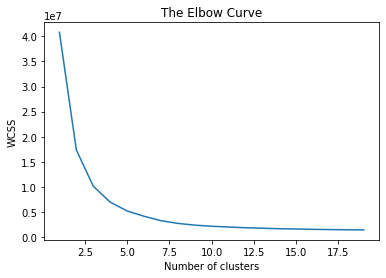

In [45]:
# Creating a funtion with KMeans to plot "The Elbow Curve"
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=0)
    kmeans.fit(scaled_feature)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') ##within-cluster sum of square
plt.show()




The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters. Our Elbow point is around cluster size of 5(beuween 2.5 and 5). We will use k=5 to further interpret our clustering result

### Fit K-Means clustering for k=5

In [46]:
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(scaled_feature)

KMeans(n_clusters=4, random_state=0)

As a result of clustering, we have the clustering label. Let's put these labels back into the original numeric data frame.

In [47]:
len(kmeans.labels_)

29633

In [48]:
df['cluster'] = kmeans.labels_

In [49]:
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,not disclosed,18.995,10,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,0


## Interpreting Clustering Results

Let's see cluster sizes first

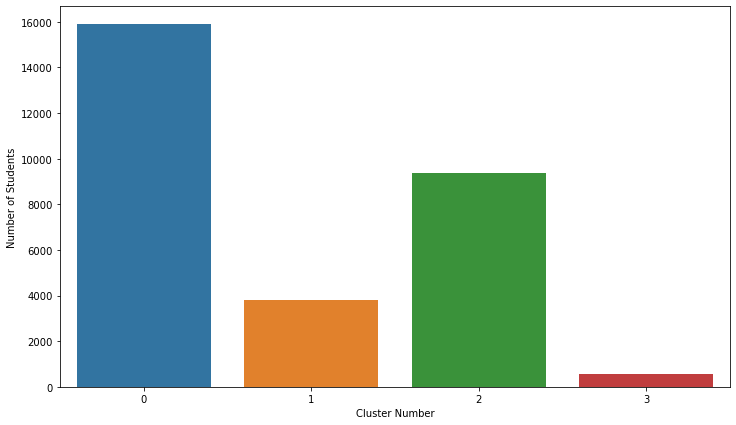

In [50]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,4,1),y=df.groupby(['cluster']).count()['age'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of Students")

plt.savefig('Seven Clusters Barplot')

From the above plot we can see that cluster 0 is the largest and cluster 1 has fewest teen students

Let' see the number of students belonging to each cluster

In [51]:
size_array = list(df.groupby(['cluster']).count()['age'].values)
size_array

[15885, 3783, 9384, 581]

let's check the cluster statistics

In [52]:
df.groupby(['cluster']).mean()[['basketball', 'football','soccer', 'softball','volleyball','swimming','cheerleading','baseball','tennis','sports','cute','sex','sexy','hot','kissed','dance','band','marching','music','rock','god','church','jesus','bible','hair','dress','blonde','mall','shopping','clothes','hollister','abercrombie','die', 'death','drunk','drugs']]

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.228077,0.233428,0.195027,0.122317,0.114196,0.118288,0.089518,0.093736,0.081649,0.129493,...,0.081523,0.222978,0.304123,0.137362,0.055146,0.040919,0.179792,0.103620,0.084923,0.063834
1,0.319059,0.279672,0.278351,0.241343,0.182924,0.154375,0.160455,0.135342,0.092784,0.147238,...,0.105472,0.338620,0.457838,0.164420,0.101507,0.074280,0.176844,0.124504,0.097542,0.049167
2,0.306053,0.274723,0.245098,0.194160,0.172528,0.152067,0.111253,0.112745,0.093137,0.155051,...,0.123934,0.275256,0.388427,0.160273,0.078325,0.056053,0.192455,0.127664,0.087489,0.057864
3,0.428571,0.301205,0.258176,0.228916,0.223752,0.172117,0.196213,0.117040,0.111876,0.135972,...,0.139415,0.425129,0.530120,0.192771,0.141136,0.115318,0.213425,0.142857,0.127367,0.058520


In [53]:
df.groupby(['cluster']).mean()[['basketball', 'football','soccer', 'softball','volleyball','swimming','cheerleading','baseball','tennis','sports','cute','sex','sexy','hot','kissed','dance','band','marching','music','rock','god','church','jesus','bible','hair','dress','blonde','mall','shopping','clothes','hollister','abercrombie','die', 'death','drunk','drugs']]>.25

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
cluster,,,,,,,,,,,,,,,,,,,,,
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,True,True,True,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,True,True,True,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False


The cluster center values shows each of the cluster centroids of the coordinates. The row referes to the five clusters,the numbers across each row indicates the cluster’s average value for the interest listed at the top of the column. Positive values are above the overall mean level.

In [54]:
df.groupby(['cluster']).mean()[['basketball', 'football','soccer', 'softball','volleyball','swimming','cheerleading','baseball','tennis','sports','cute','sex','sexy','hot','kissed','dance','band','marching','music','rock','god','church','jesus','bible','hair','dress','blonde','mall','shopping','clothes','hollister','abercrombie','die', 'death','drunk','drugs']].T

cluster,0,1,2,3
basketball,0.228077,0.319059,0.306053,0.428571
football,0.233428,0.279672,0.274723,0.301205
soccer,0.195027,0.278351,0.245098,0.258176
softball,0.122317,0.241343,0.194160,0.228916
volleyball,0.114196,0.182924,0.172528,0.223752
swimming,0.118288,0.154375,0.152067,0.172117
cheerleading,0.089518,0.160455,0.111253,0.196213
baseball,0.093736,0.135342,0.112745,0.117040
tennis,0.081649,0.092784,0.093137,0.111876
sports,0.129493,0.147238,0.155051,0.135972
